In [318]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [319]:
data = pd.read_csv('C:/Users/HP/Desktop/задание 3/housing.csv')

In [320]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [321]:
X, y = data.values[:,:-1], data.values[:,-1]
poly = PolynomialFeatures(2, include_bias = False, interaction_only = False) #the term intercept not included 
# Split the data into 83% train and 17% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, shuffle=True, random_state=42)
X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)
X_train.shape, X_test.shape #dimension of matrix after transformation 

((419, 104), (87, 104))

In [322]:
# Creating polynomial features (including squares and interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [323]:
model = LinearRegression(fit_intercept = False) #the model will be forced to pass through the origin (0,0). there is no biais 
model = model.fit(X_train,y_train)
model.score(X_test, y_test), mean_absolute_error(model.predict(X_test),y_test) # calcule le R² /calcule l'erreur absolue moyenne (MAE)

(0.8796096931758247, np.float64(2.3137698642166367))

In [324]:
# Make predictions
y_pred = model.predict(X_test)

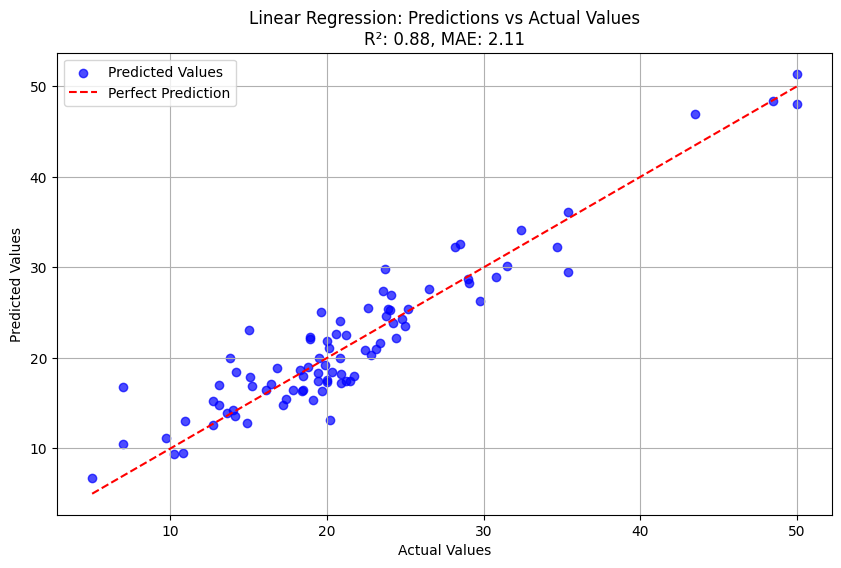

In [325]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Line of perfect prediction
plt.title(f'Linear Regression: Predictions vs Actual Values\nR²: {r_squared:.2f}, MAE: {mae:.2f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [326]:
U, s, Vh = np.linalg.svd(X_train) #division in 3 matrix to reduce the complexity of calculs 

In [327]:
k = np.linalg.matrix_rank(X_train) # calcule le rang de la matrice X_train
alpha = np.zeros(X_train.shape[1]) #alpha regulates the intensity of the regularization
# Initialize regularization coefficients
mae_values = []
# Loop through each singular value to compute MAE

for j in range(k):
    # Update alpha using the j-th singular value
    alpha = alpha + Vh[j,:]*(U[:,j]@y_train)/s[j]
    mae = np.linalg.norm(X_test@alpha - y_test,1)/y_test.shape[0]
    mae_values.append(mae)
    print(mae)

13.83551475252431
7.5028374758017895
5.669167106615101
5.3014835409428285
5.268966038381471
5.282312029576706
5.150191182920973
4.878259062008712
4.875318829181102
4.781549234074181
4.75106737764202
4.75474880198106
4.8081186596669045
4.4493817020156765
4.336239874134355
4.422883718464645
4.500802258842485
4.539163788345998
3.780429585860706
3.680429991060066
3.6773488933398553
3.718778028065781
3.7039900194171302
3.6128038463800927
3.6080871716923366
3.2710235354772186
2.6126827819718605
2.6396413786405204
2.6338191776685465
2.669826195754435
2.682364155402872
2.6759172526560984
2.6661580271391703
2.6085740531641317
2.5983327588648266
2.6091492950301425
2.616531185227817
2.6681884598647723
2.668668129263368
2.688862539962419
2.647851559469062
2.6481397395784683
2.6111913861687825
2.582378005563905
2.5341647399544494
2.5132575709238205
2.5387596703746524
2.516917472116805
2.388345855763309
2.400381848482937
2.4039367847299853
2.500765157002628
2.5097306987463246
2.5213765410472844
2.52

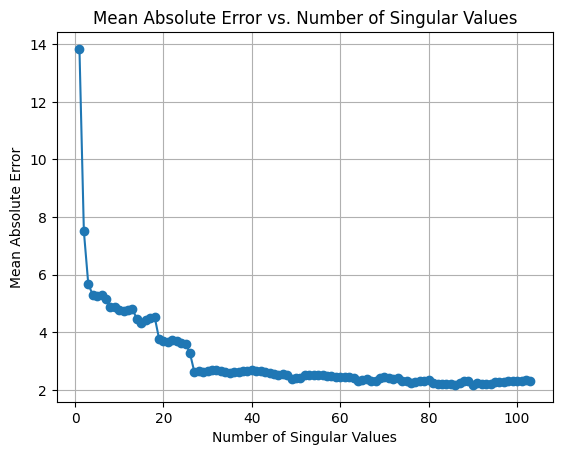

In [328]:
plt.plot(range(1, len(mae_values) + 1), mae_values, marker='o')  # Plot from 1 to len(mae_values)
plt.title('Mean Absolute Error vs. Number of Singular Values')
plt.xlabel('Number of Singular Values')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

In [329]:
# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [330]:
# Étape 4 : Entraîner le modèle de régression Ridge
ridge_model = Ridge(alpha=4.2)  # Ajustez alpha selon vos besoins
ridge_model.fit(X_train_scaled, y_train)
# Étape 5 : Prédictions
y_pred = ridge_model.predict(X_test_scaled)

# Étape 6 : Évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# Afficher les résultats
print(f'Erreur Absolue Moyenne (MAE) : {mae}')
print(f'Erreur Quadratique Moyenne (RMSE) : {rmse}')
print(f'Coefficient de Détermination (R^2) : {r2}')

Erreur Absolue Moyenne (MAE) : 2.113609094445182
Erreur Quadratique Moyenne (RMSE) : 2.6839253425914604
Coefficient de Détermination (R^2) : 0.8999377475701662


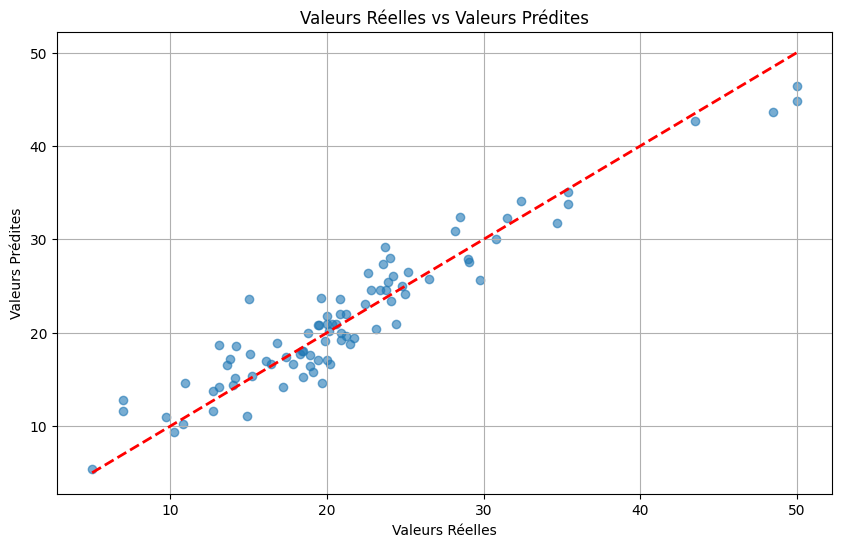

In [331]:
# 1. Comparison of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Valeurs Réelles vs Valeurs Prédites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.grid()
plt.show()
#This graph shows the relationship between actual and predicted values.
#  The red line represents perfect prediction (actual values = predicted values).
#  The closer the points are to this line, the better the model's performance.


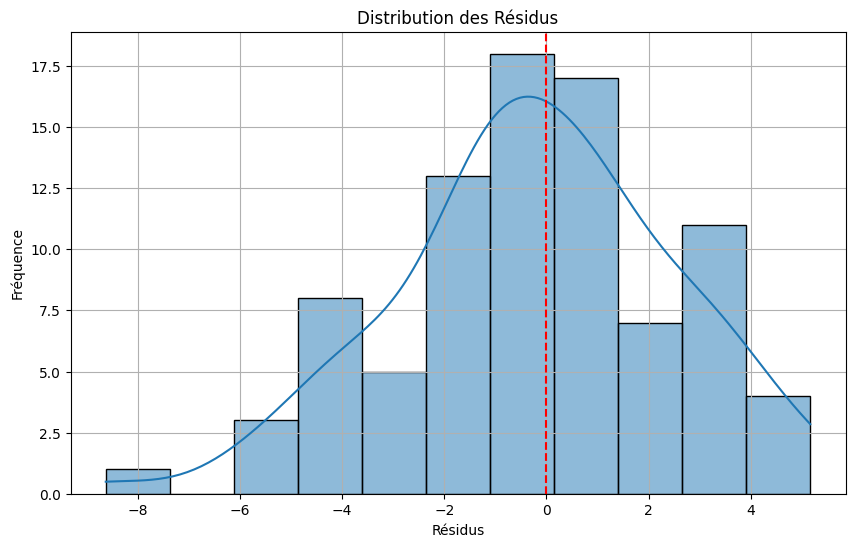

In [332]:
# 2. Residuals Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.grid()
plt.axvline(0, color='red', linestyle='--')
plt.show()
#This graph shows the distribution of errors (residuals).
#  A distribution centered around 0 without significant bias to the left or right indicates a good model fit.


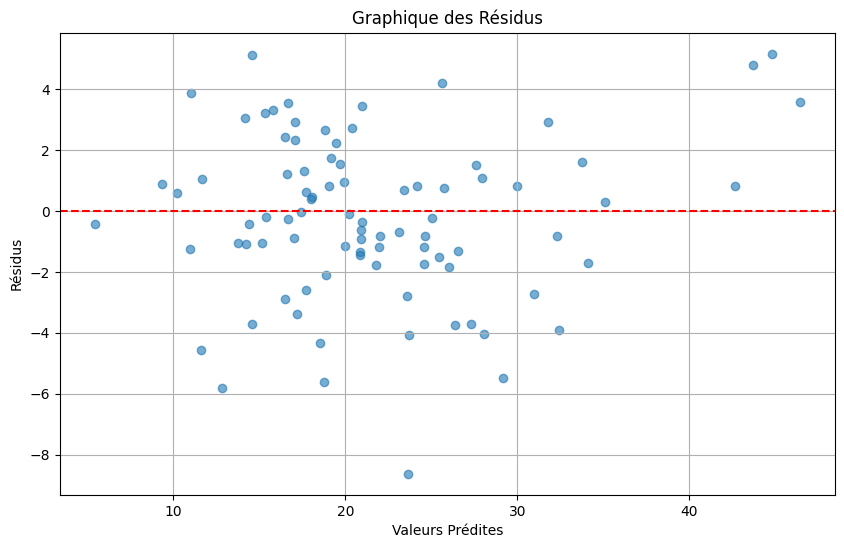

In [333]:
# 3. Residuals vs Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Graphique des Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.grid()
plt.show()
#This graph displays the residuals against the predicted values.
#  A good model will have residuals randomly scattered around 0 without a visible trend.